## Image normalisation workflow

The intensity images stained for S-opsin show variations in regards to their signal. Hence, it is recommended to normalise the images prior the ground truth annotation and the training of the random forest classifier. 

However, when normalising the training data it is also recommended to normalise the images used for statistical analysis afterwards.

Here the workflow for the image normalisation will be demonstrated. An example image from the dataset will be loaded, the background subtracted (`cle.top_hat_box`), and the intensity normalised based on the maximum intensity.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pyclesperanto_prototype as cle

### Open example from dataset

3 3 lens


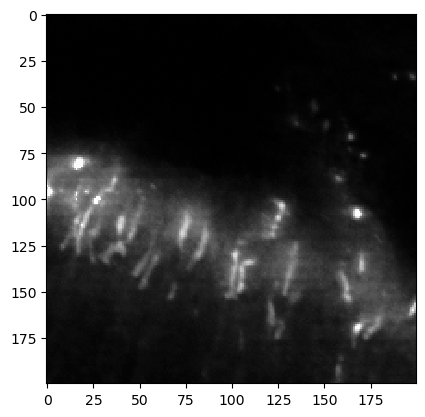

In [4]:
# Define path of the dataset
file_path = "../data/02-data-for-pixel-classifier/statistics-data/"

# Load image
image = cle.imread(file_path + "C1-p16-20x-zoom-suse-2.2-replicate-20.tif")

# Show image
cle.imshow(image[..., 100:300, 800:1000])

### Apply background subtraction

A top-hat-filter will be applied with `cle.top_hat_box()` with a radius set to 3 in all dimensions (x, y, z).

3 3 lens


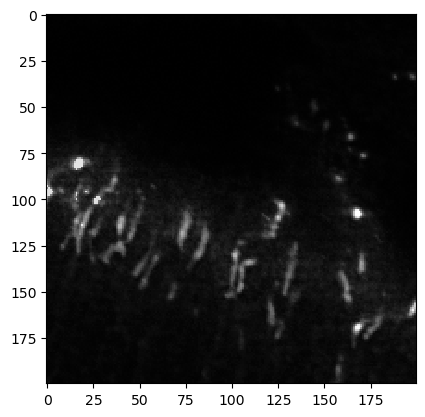

In [6]:
# Subtract background
image_background_subtracted = cle.top_hat_box(source=image,
                                              radius_x=3,
                                              radius_y=3,
                                              radius_z=3)

# Show the processed image
cle.imshow(image_background_subtracted[..., 100:300, 800:1000])

### Normalise intensity

Additionally, the intensity changes throughout the images as well. Here, it will be normalised based on the maximum intensity of each image. 

$normalised\_image = \frac{image}{maximum\_intensity} * 2^{12}$

In [10]:
# Retriev max intensity
max_intensity = np.max(image_background_subtracted)
print("Maximum intensity of image:", max_intensity)

Maximum intensity of image: 1729.0


Maximum intensity of normalised image: 4096.0
3 3 lens


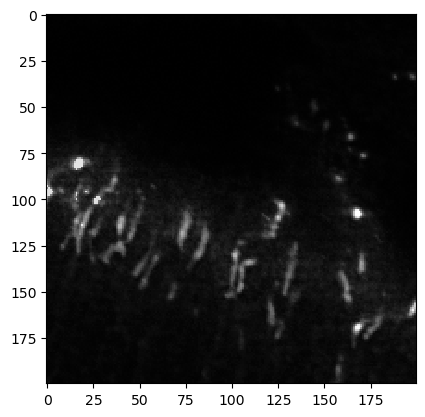

In [11]:
# Normalise the image
normalised_image = (image_background_subtracted / max_intensity) * np.power(2, 12)
print("Maximum intensity of normalised image:", np.max(normalised_image))
cle.imshow(normalised_image[..., 100:300, 800:1000])

### Display images

Show all three images next to each other.

3 3 lens
3 3 lens
3 3 lens


Text(0.5, 1.0, 'Normalised Image')

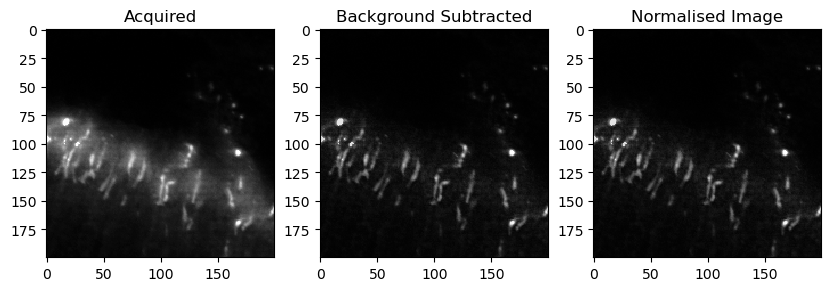

In [14]:
fig, axs = plt.subplots(1, 3, figsize=(10, 10))

cle.imshow(image[..., 100:300, 800:1000], plot=axs[0])
axs[0].set_title("Acquired")

cle.imshow(image_background_subtracted[..., 100:300, 800:1000], plot=axs[1])
axs[1].set_title("Background Subtracted")

cle.imshow(normalised_image[..., 100:300, 800:1000], plot=axs[2])
axs[2].set_title("Normalised Image")

### Function for normalisation

A function can be written for the normalisation.

In [15]:
def normalise_image(image):
    '''
    Normalizes an intensity image for training data used by the OS pixel classifier (quapos-lm.cl).

    Parameters:
    image (numpy.ndarray): Input intensity image to be normalized.

    Returns:
    numpy.ndarray: Normalized intensity image.

    Normalizes the input intensity image by performing the following steps:
    1. Applies top-hat background subtraction using a box-shaped structuring element with a radius of 3 pixels.
    2. Calculates the maximum intensity value in the background-subtracted image.
    3. Normalizes the intensity values by dividing by the maximum intensity value and scaling to fit within the dynamic range [0, 2^12].
    
    Example:
    >>> normalized_image = normalise_image(intensity_image)
    '''
    
    import numpy as np
    import pyclesperanto_prototype as cle
    
    # Apply top-hat background subtraction to the input image
    image_background_subtracted = cle.top_hat_box(source=image,
                                                  radius_x=3,
                                                  radius_y=3,
                                                  radius_z=3)
    
    # Find the maximum intensity value in the background-subtracted image
    max_intensity = np.max(image_background_subtracted)
    
    # Normalize the intensity values to fit within [0, 2^12] dynamic range
    image_normalised_intensity = (image_background_subtracted / max_intensity) * np.power(2, 12)
    
    return image_normalised_intensity

In [16]:
# Normalise image with function
normalised_with_function = normalise_image(image)

In [17]:
np.array_equal(normalised_image, normalised_with_function)

True